In this notebook I am trying to create a Multi-layer perceptron from scratch, meaning I will only use numPy for creating and training the NN.

The goal with this project is to learn how a MLP "learns" and to understand the calculus behind basic concepts in deep learning, like gradient descent and back-propagation.

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create training and testing arrays

(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

# normalize pixel values to 0-1

x_train = x_train/255
x_test = x_test/255

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# constants
HIDDEN_LAYER_NEURONS = 16
TRAINING_SIZE = 60000
LEARN_RATE = 0.01  # Reduced learning rate

def sigmoid(x):
  return 1/(1+np.exp(-(x)))

def d_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

def cost_fn(y_hat,y):
  return (y_hat-y)**2

def d_cost_fn(y_hat,y):
  return 2*(y_hat-y)

In [4]:
# create variables

# we are creating a 1 hidden layer MLP
hidden_layer_activation = np.random.rand(HIDDEN_LAYER_NEURONS)
hidden_layer_z = np.random.rand(HIDDEN_LAYER_NEURONS)

# neuron biases
hidden_biases = np.random.randn(HIDDEN_LAYER_NEURONS) * 0.01
output_biases = np.random.randn(10) * 0.01

# weight matrix
input_weights = np.random.randn(HIDDEN_LAYER_NEURONS,784) * 0.01
output_weights = np.random.randn(10,HIDDEN_LAYER_NEURONS) * 0.01

# deltas
delta_w0 = np.zeros((784,HIDDEN_LAYER_NEURONS))
delta_w1 = np.zeros((HIDDEN_LAYER_NEURONS,10))
delta_b0 = np.zeros(HIDDEN_LAYER_NEURONS)
delta_b1 = np.zeros(10)

# output layer
y_hat = np.zeros(10)
y_hat_z = np.zeros(10)

<function matplotlib.pyplot.show(close=None, block=None)>

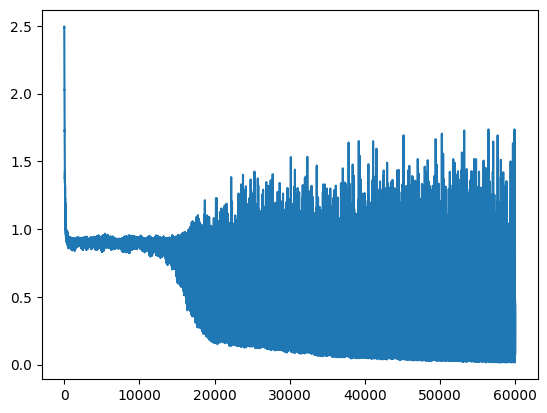

In [5]:
# training

cost = 0
cost_arr = []

for i in range(0,TRAINING_SIZE):
  # feed forward
  input_layer = x_train[i].reshape(784)

  hidden_layer_z = np.dot(input_weights,input_layer)+hidden_biases
  hidden_layer_activation = sigmoid(hidden_layer_z)

  y_hat_z = np.dot(output_weights,hidden_layer_activation)+output_biases
  y_hat = sigmoid(y_hat_z)

  y = np.zeros(10)
  y[y_train[i]] = 1

  cost = cost_fn(y_hat,y)

  # backpropagation
  delta = d_cost_fn(y_hat,y)*d_sigmoid(y_hat_z)

  delta_b1 = delta
  delta_w1 = np.dot(delta.reshape(10,1),hidden_layer_activation.reshape(1,16))

  delta = np.dot(delta,output_weights)*d_sigmoid(hidden_layer_z)

  delta_b0 = delta
  delta_w0 = np.dot(delta.reshape(16,1),input_layer.reshape(1,784))

  hidden_biases -= delta_b0 * LEARN_RATE
  output_biases -= delta_b1 * LEARN_RATE
  input_weights -= delta_w0 * LEARN_RATE
  output_weights -= delta_w1 * LEARN_RATE

  cost_arr.append(np.sum(cost))

plt.plot(cost_arr)
plt.show

In [6]:
# evaluate
test_results = []

for i in range(0,x_test.shape[0]):
  input_layer = x_test[i].reshape(784)

  hidden_layer_z = np.dot(input_weights,input_layer)+hidden_biases
  hidden_layer_activation = sigmoid(hidden_layer_z)

  y_hat_z = np.dot(output_weights,hidden_layer_activation)+output_biases
  y_hat = sigmoid(y_hat_z)

  y = y_test[i]

  test_results.append((np.argmax(y_hat),y))

print(f'{sum(int(x == y) for (x, y) in test_results)/y_test.shape[0]*100}% accuracy')

87.55% accuracy
